## GRIP: The Spark Foundation

## Data science and Business Analytics Intern

## Author: Priya Meharwade

## Task7- Stock Market Prediction using Numerical and Textual Analysis

### Objective- Create a Hybrid Model for stock Price/Performance Prediction using Numerical Analysis of historical stock Prices and setiment Analysis of New Headlines

In [1]:
pip install pandas-datareader      

Note: you may need to restart the kernel to use updated packages.


Importing data and necessary libraries

In [2]:
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pdr.get_data_tiingo('AAPL', api_key='241991618dacded8e4fd14d7d07704c5bff19987')

C:\Users\hp\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-12-18 00:00:00+00:00  176.42  177.20  174.86  174.88  28831533   
       2017-12-19 00:00:00+00:00  174.54  175.39  174.09  175.03  27078872   
       2017-12-20 00:00:00+00:00  174.35  175.42  173.25  174.87  23000392   
       2017-12-21 00:00:00+00:00  175.01  176.02  174.10  174.17  20356826   
       2017-12-22 00:00:00+00:00  175.01  175.42  174.50  174.68  16052615   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-18 00:00:00+00:00  41.937498  42.122915  41.566664  41.571419   
       2017-12-19 00:00:00+00:00  41.490596  41.692653  41.383624  41.607076   
       2017-12-20 00:00:00+00:00  41.445430  41.699784  41.183945  41.569041   
       2017-12-21 00:00:00+00:00  41.602321  41.842412  41.386002  41.402642   
       2017-12-22 00:00:00+00:00  41.602321  41.699784  41.481087  41.523876   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-18 00:00:00+00:00  115326132      0.0          1.0  
       2017-12-19 00:00:00+00:00  108315488      0.0          1.0  
       2017-12-20 00:00:00+00:00   92001568      0.0          1.0  
       2017-12-21 00:00:00+00:00   81427304      0.0          1.0  
       2017-12-22 00:00:00+00:00   64210460      0.0          1.0

In [6]:
df.tail()

close      high      low    open    volume  \
symbol date                                                                     
AAPL   2022-12-09 00:00:00+00:00  142.16  145.5700  140.900  142.34  76097011   
       2022-12-12 00:00:00+00:00  144.49  144.5000  141.060  142.70  70462654   
       2022-12-13 00:00:00+00:00  145.47  149.9692  144.240  149.50  93886161   
       2022-12-14 00:00:00+00:00  143.21  146.6550  141.160  145.35  82291182   
       2022-12-15 00:00:00+00:00  136.50  141.8000  136.025  141.11  98931907   

                                  adjClose   adjHigh   adjLow  adjOpen  \
symbol date                                                              
AAPL   2022-12-09 00:00:00+00:00    142.16  145.5700  140.900   142.34   
       2022-12-12 00:00:00+00:00    144.49  144.5000  141.060   142.70   
       2022-12-13 00:00:00+00:00    145.47  149.9692  144.240   149.50   
       2022-12-14 00:00:00+00:00    143.21  146.6550  141.160   145.35   
       2022-12-15 00:00:00+00:00    136.50  141.8000  136.025   141.11   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-12-09 00:00:00+00:00   76097011      0.0          1.0  
       2022-12-12 00:00:00+00:00   70462654      0.0          1.0  
       2022-12-13 00:00:00+00:00   93886161      0.0          1.0  
       2022-12-14 00:00:00+00:00   82291182      0.0          1.0  
       2022-12-15 00:00:00+00:00   98931907      0.0          1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1258 entries, ('AAPL', Timestamp('2017-12-18 00:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2022-12-15 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1258 non-null   float64
 1   high         1258 non-null   float64
 2   low          1258 non-null   float64
 3   open         1258 non-null   float64
 4   volume       1258 non-null   int64  
 5   adjClose     1258 non-null   float64
 6   adjHigh      1258 non-null   float64
 7   adjLow       1258 non-null   float64
 8   adjOpen      1258 non-null   float64
 9   adjVolume    1258 non-null   int64  
 10  divCash      1258 non-null   float64
 11  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 164.0+ KB


In [8]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,191.037774,193.092326,188.752818,190.820571,6.225312e+07,96.141016,97.239948,94.955424,96.072891,1.167916e+08,0.008148,1.002385
std,68.894521,69.519644,67.909555,68.600024,4.084536e+07,46.825253,47.415671,46.195851,46.814176,5.478176e+07,0.072449,0.084583
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,34.307597,35.159316,34.261754,34.739489,3.519586e+07,0.000000,1.000000
25%,146.367500,147.873425,144.682500,145.982500,2.880908e+07,49.290517,49.663374,48.829249,49.167895,8.038186e+07,0.000000,1.000000
50%,172.340000,173.975000,170.725000,172.147500,5.330113e+07,86.759761,87.626227,86.192374,86.733915,1.025736e+08,0.000000,1.000000
75%,209.557500,211.997500,207.605000,209.870000,8.642134e+07,142.170271,143.610559,140.421558,142.207368,1.365306e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,180.959680,181.884313,178.086357,181.576102,4.268849e+08,0.820000,4.000000


In [9]:
df.shape

(1258, 12)

In [10]:
df.isnull().sum()
df1=df.reset_index()['close']

In [11]:
df1.isnull().sum()

0

In [12]:
df1.shape

(1258,)

In [13]:
df1

0       176.42
1       174.54
2       174.35
3       175.01
4       175.01
         ...  
1253    142.16
1254    144.49
1255    145.47
1256    143.21
1257    136.50
Name: close, Length: 1258, dtype: float64

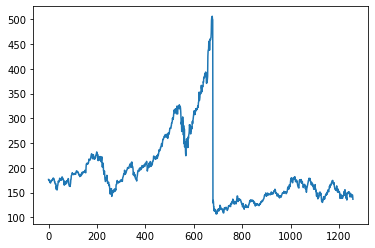

In [14]:
#plot baseline and predictions
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM sensitive to sacle of data

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
len(df1)

1258

This is time series data, cross validation and random seed works on categorical data, so we need to devide data into train and
test data 

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [20]:
training_size

817

In [21]:
test_size

441

In [22]:
train_data

array([[1.74276769e-01],
       [1.69567940e-01],
       [1.69092048e-01],
       [1.70745147e-01],
       [1.70745147e-01],
       [1.59624296e-01],
       [1.59699436e-01],
       [1.60901691e-01],
       [1.56268003e-01],
       [1.63857232e-01],
       [1.63782091e-01],
       [1.65785848e-01],
       [1.70720100e-01],
       [1.69092048e-01],
       [1.69041954e-01],
       [1.68941766e-01],
       [1.71421415e-01],
       [1.75954915e-01],
       [1.73700689e-01],
       [1.80989355e-01],
       [1.81390106e-01],
       [1.79386349e-01],
       [1.75729493e-01],
       [1.75829681e-01],
       [1.68766437e-01],
       [1.60976832e-01],
       [1.61978710e-01],
       [1.53087038e-01],
       [1.50607389e-01],
       [1.51759549e-01],
       [1.52636193e-01],
       [1.34402004e-01],
       [1.24358172e-01],
       [1.40738885e-01],
       [1.31997495e-01],
       [1.21001879e-01],
       [1.24157796e-01],
       [1.39937383e-01],
       [1.44020038e-01],
       [1.51609267e-01],


timeseries data=100,150,170,140,159,165,200,185
tiemsteps to be calculated for predicting the future stockprice

f1  f2  o/p
100 150 170 140
159 165 200 185 

In [23]:
import numpy

def dataset_func(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(datax),numpy.array(datay)


In [24]:
time_step=100
x_train,y_train=dataset_func(train_data,time_step)
x_test,y_test=dataset_func(test_data,time_step)

In [25]:
print(x_train.shape)

(716, 100)


In [26]:
print(y_train.shape)

(716,)


In [27]:
print(x_test.shape,y_test.shape)


(340, 100) (340,)


In [28]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [29]:
pip install tensorflow

In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential


created LSTM model for prediction using layers in differnet sizes

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32,verbose=1)


Epoch 1/5
23/23 [==============================] - 18s 291ms/step - loss: 0.0312 - val_loss: 0.0068
Epoch 2/5
23/23 [==============================] - 4s 176ms/step - loss: 0.0127 - val_loss: 0.0018
Epoch 3/5
23/23 [==============================] - 4s 181ms/step - loss: 0.0106 - val_loss: 4.0933e-04
Epoch 4/5
23/23 [==============================] - 4s 177ms/step - loss: 0.0085 - val_loss: 9.6986e-04
Epoch 5/5
23/23 [==============================] - 4s 177ms/step - loss: 0.0072 - val_loss: 4.4430e-04


In [34]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


11/11 [==============================] - 1s 66ms/step


In [35]:
import math

finding the error in prediction of test data and predicted value

In [36]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



0.08035423496640672

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))


0.02107838024552901

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting


In [39]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict



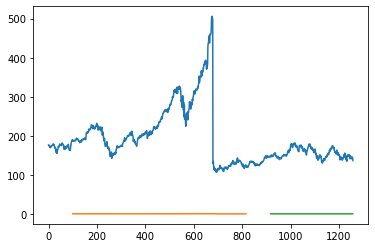

In [40]:
# plot baseline and predictions
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [41]:
len(test_data)

441

In [42]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 101)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731367,
 0.1485034439574201,
 0.1477019411396368,
 0.14654978083907322,
 0.1453475266123982,
 0.14547276142767684,
 0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346,
 0.1695929868503444,
 0.1685911083281152,
 0.16200375704445835,
 0.15211020663744512,
 0.15125860989355033,
 0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.12303068252974325,
 0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    



0 day input [0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.103

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [46]:
len(df1)

1258

plotting graph of predicted output of stock for next 30 days in different color/visualisation

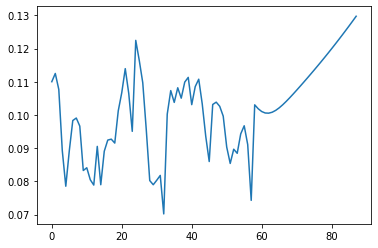

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

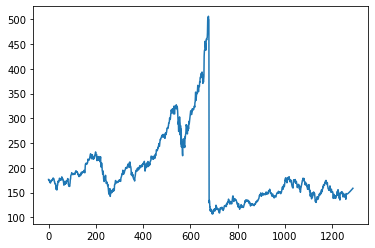

In [48]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)


In [ ]:
Thank you